### Uber Pickups Analysis 

The analysis is based on the August dataset, `uber-raw-data-aug14.csv`.



In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Date on which we see the most number of Uber pickups

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [3]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [4]:
df['Date'] = df['Date/Time'].dt.date

In [5]:
# Group by date and count the number of pickups
pickup = df.groupby(df['Date']).count().reset_index()
pickup.head(5)

,Date,Date/Time,Lat,Lon,Base
0,2014-08-01,32353,32353,32353,32353
1,2014-08-02,28678,28678,28678,28678
2,2014-08-03,23146,23146,23146,23146
3,2014-08-04,24952,24952,24952,24952
4,2014-08-05,28094,28094,28094,28094


In [6]:
# Find the date with the highest number of pickups
highest = pickup.sort_values(by = 'Lat',ascending = False).reset_index()
print("Highest pickup happened on ",highest.iloc[0]['Date'])

Highest pickup happened on  2014-08-07


#### Uber pickups were made on the date with the highest number of pickups


In [7]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
pickup_highest_date_row = df[df['Date'] == highest.iloc[0]['Date'] ]
print(pickup_highest_date_row.head(5))


               Date/Time      Lat      Lon    Base        Date
6944 2014-08-07 00:03:00  40.7455 -73.9895  B02512  2014-08-07
6945 2014-08-07 00:09:00  40.7499 -74.0025  B02512  2014-08-07
6946 2014-08-07 00:10:00  40.7417 -74.0037  B02512  2014-08-07
6947 2014-08-07 00:16:00  40.6416 -73.7879  B02512  2014-08-07
6948 2014-08-07 00:16:00  40.7008 -73.9405  B02512  2014-08-07


In [8]:
# Get the count of pickups on the highest date
print("Count of pickups on highest date", pickup_highest_date_row.shape[0])
print("Count of pickups on highest date",df['Date'].value_counts()[0])

Count of pickups on highest date 32759
Count of pickups on highest date 32759


#### Unique TLC base companies are affiliated with the Uber pickups in the dataset


In [9]:
# Count the number of unique TLC base companies
unique_company_count = df['Base'].nunique()
print("No of unique companies affiliated with uber ", unique_company_count)

No of unique companies affiliated with uber  5


#### TLC base company had the highest number of pickups


In [10]:
# Group by TLC base company and count the number of pickups
tlc_groupby = df.groupby('Base').count()
tlc_groupby

,Date/Time,Lat,Lon,Date
Base,,,,
B02512,31472,31472,31472,31472
B02598,220129,220129,220129,220129
B02617,355803,355803,355803,355803
B02682,173280,173280,173280,173280
B02764,48591,48591,48591,48591


In [11]:
tlc_base_company = df['Base'].value_counts()
tlc_base_company

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

In [12]:
# Find the TLC base company with the highest number of pickups
highest_base_pickup = tlc_groupby.sort_values(by = 'Date',ascending = False).reset_index()
print("Base location with highest pickup ",highest_base_pickup.iloc[0]['Base'])

Base location with highest pickup  B02617


#### Uber pickups were made at each unique TLC base company


In [13]:
# Group by TLC base company and count the number of pickups
df['Base'].value_counts()

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

#### Determine the busiest time of day for Uber pickups based on the date/time column



In [14]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour
df['Hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: Hour, dtype: int64

In [15]:
# Group by hour and count the number of pickups
print(df['Hour'].value_counts())
# print('-'*35)
# print(df.groupby('Hour').size())

17    57122
18    55390
16    53481
19    53008
20    51674
21    51354
15    48197
22    46008
14    40644
13    35764
8     34566
7     34064
23    33609
12    32106
11    31778
10    30706
9     30195
6     24907
0     21451
5     16525
1     14471
4     11774
3     10376
2     10105
Name: Hour, dtype: int64


In [16]:
# Find the hour with the highest number of pickup
hour_groupby = df.groupby('Hour').count()
hour_with_highest_pickup = hour_groupby.sort_values(by ='Date',ascending = False)
#print(hour_with_highest_pickup.head())
print("Hour with highest pickup is ",hour_with_highest_pickup.iloc[0]['Base'])

Hour with highest pickup is  57122


#### To represent the number of Uber pickups over time?


In [17]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_group = df.groupby('Date').count().reset_index()
pickup_group.head()

,Date,Date/Time,Lat,Lon,Base,Hour
0,2014-08-01,32353,32353,32353,32353,32353
1,2014-08-02,28678,28678,28678,28678,28678
2,2014-08-03,23146,23146,23146,23146,23146
3,2014-08-04,24952,24952,24952,24952,24952
4,2014-08-05,28094,28094,28094,28094,28094


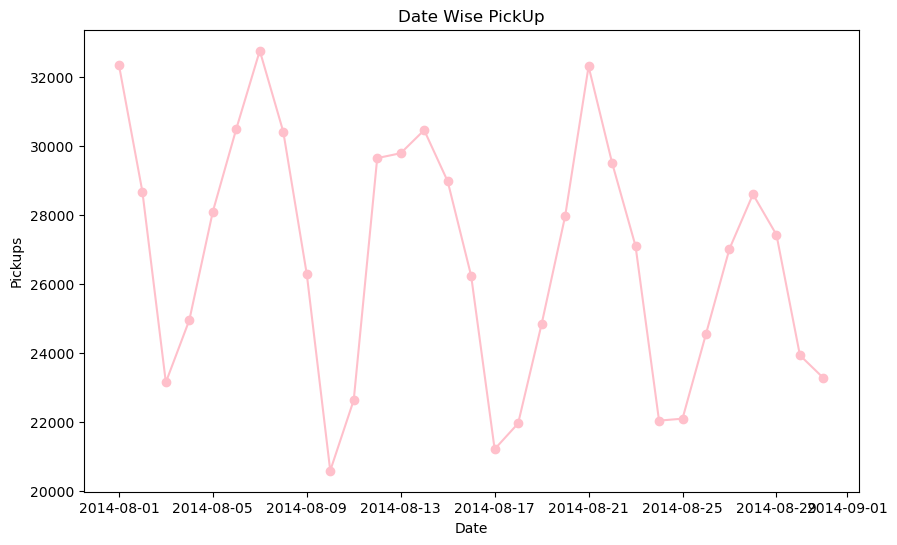

In [18]:
# Create a line plot to visualize the number of pickups over time

#plot figuresize
plt.figure(figsize=(10, 6))  # Width: 8 inches, Height: 6 inches


# Plotting the line chart
plt.plot(pickup_group['Date'], pickup_group['Lat'], marker='o', linestyle='-', color='pink')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Pickups')
plt.title('Date Wise PickUp')

# Display the plot
plt.show()


#### Scatter plot to visualize the distribution of Uber pickups based on latitude and longitude


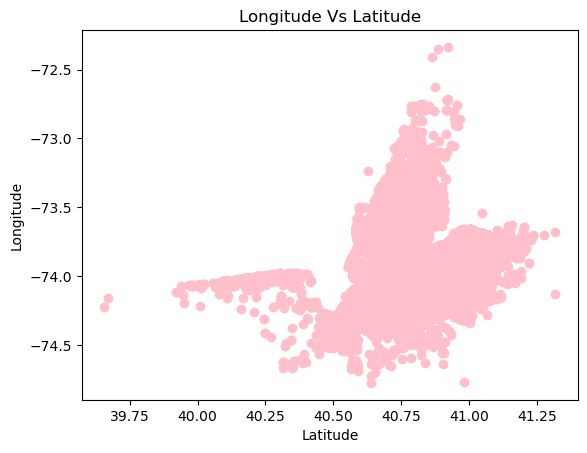

In [19]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lat'],df['Lon'],marker = 'o',color ='pink',label = 'Data Points')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude Vs Latitude')

plt.show()

#### Bar chart to compare the number of Uber pickups for each TLC base company


In [20]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
base_loc = df['Base'].value_counts()
base_loc

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

In [21]:
categories = list(base_loc.index)
values = list(base_loc.values)

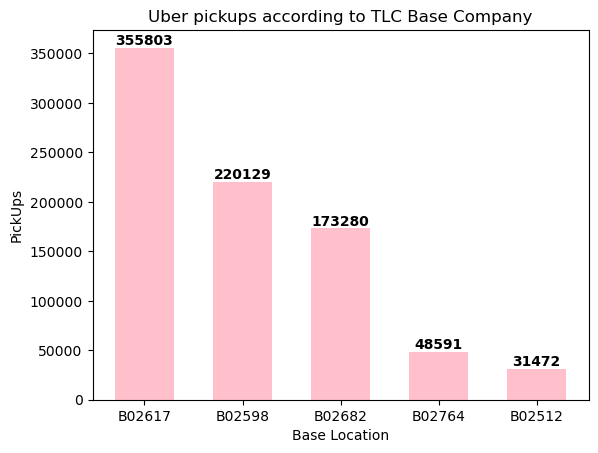

In [22]:
# Customized bar chart
plt.bar(categories, values, color='pink', width=0.6, align='center')

# Adding data labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Adding labels and title
plt.xlabel('Base Location')
plt.ylabel('PickUps')
plt.title('Uber pickups according to TLC Base Company')

# Display the plot
plt.show()

#### A Pie chart to display the percentage distribution of Uber pickups for each day of the week


In [23]:
# Group by day of the week and count the number of pickups
df['weekday'] = df['Date/Time'].dt.day_name()
weekdaycounts = df['weekday'].value_counts()
weekdaycounts

Friday       148674
Saturday     132225
Thursday     124117
Wednesday    115256
Sunday       110246
Tuesday      107124
Monday        91633
Name: weekday, dtype: int64

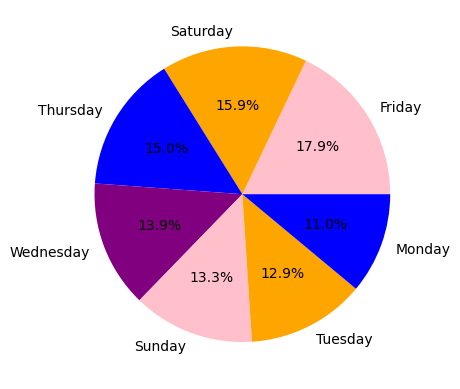

In [24]:
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(weekdaycounts.values,labels = weekdaycounts.index,autopct='%1.1f%%',colors=['pink','orange','blue','purple'])
plt.show()